## Finding stable patterns in Hopfield model with random weights

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Width  = 5
Height = 5

### Initializing random weights

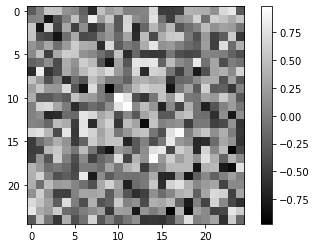

In [3]:
Jij = np.random.rand(Width*Height, Width*Height) * 2 - 1

# for i in range(Width*Height):
#    Weight[i,i] = 0

Jij = (Jij + Jij.T)/2

plt.imshow(Jij, cmap='gray')
plt.colorbar()
plt.show()

### Initializing random inputs

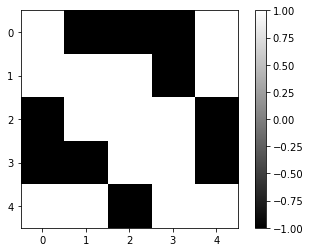

In [4]:
Input = np.random.rand(Width*Height,1) > 0.5
Input = 2 * Input - 1

plt.imshow(Input.reshape(Width,Height), cmap='gray')
plt.colorbar()
plt.show()

### Energy minimization using Monte-Carlo method

Energy of the system: $E = \frac{1}{2} \; \sum_{i,j} \; J_{ij} \; s_i \; s_j$

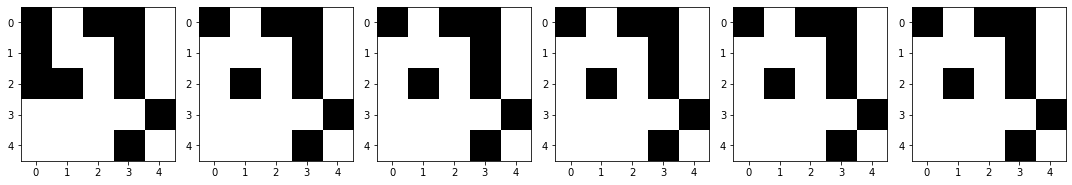

In [6]:
MaxEpoch = 5

fig, axs = plt.subplots(1, MaxEpoch+1, figsize=(15, 5))
axs[0].imshow(Input.reshape(Width,Height), cmap='gray')

for Epoch in range(MaxEpoch):
    for i in range(Width*Height):

        j = np.random.randint(Width*Height)
        Output = np.copy(Input)

        # Flip the j-th spin
        Output[j] = -1 * Output[j]

        EneryBefore = -0.5 * np.matmul(np.matmul(Input.T, Jij), Input)
        EneryAfter  = -0.5 * np.matmul(np.matmul(Output.T, Jij), Output)

        if EneryAfter < EneryBefore:
            Input = np.copy(Output)
        elif np.random.rand() < np.exp(-(EneryAfter - EneryBefore)):
            Input = np.copy(Output)

        Input[j] = np.sign(np.matmul(Jij[j,:], Input))

    axs[Epoch+1].imshow(Input.reshape(Width,Height), cmap='gray')

plt.tight_layout()
plt.show()